In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
# You can only unzip a zipped tuple once before it is removed 
# from the computer's memory. Make sure you unzip the latitudes 
# and longitudes into the coordinates list before moving on.

In [22]:
print(coordinates)

[(-64.80992125068278, -169.44647019625685), (77.46119850021503, 42.59224382773178), (-45.9273490135227, -13.392556581364602), (-52.066910444887945, 106.61056095934674), (-52.79066646560492, -36.92696556217328), (-64.66388900166541, 60.405204925265565), (15.695865288714927, -156.70477031855188), (-16.15092377487281, -43.48373356207438), (-19.44226709958957, 12.231792149874451), (-43.15893128400056, 15.895093216924664), (-50.54582403850435, 113.59708082195135), (-88.64204960986231, -16.735712670485015), (-8.634527123504768, -19.11902016824925), (-13.227454167018479, -126.70066804917667), (73.35983880788456, 88.16926240965489), (76.04033419464037, -135.59178811803122), (10.15708457381676, 97.58118841298074), (-8.562011659862307, -162.30737365788036), (-6.748405445003357, -0.5133870527041324), (-62.15537653092867, -7.8229930533284175), (-44.397122459281, 161.25653314813087), (72.46734306453743, -92.40548969034928), (14.545646600728219, -178.85888047082923), (69.04650476942572, -7.359283298

In [23]:
from citipy import citipy

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

579

### Import Dependencies, and Initialize an Empty List and Counters

In [25]:
# Import the requests library.
import requests

In [26]:
# Import the API key.
from config import weather_api_key

In [27]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [28]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

In [29]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [30]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [31]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | ostrovnoy
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | francisco sa
Processing Record 9 of Set 1 | opuwo
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | ranong
Processing Record 18 of Set 1 | samusu
City not found. Skipping...
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | te anau
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | kapaa
Proce

Processing Record 37 of Set 4 | khandyga
Processing Record 38 of Set 4 | fukue
Processing Record 39 of Set 4 | boras
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | eureka
Processing Record 42 of Set 4 | kargil
Processing Record 43 of Set 4 | varberg
Processing Record 44 of Set 4 | imperia
Processing Record 45 of Set 4 | bull savanna
Processing Record 46 of Set 4 | andilamena
Processing Record 47 of Set 4 | bayir
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | havelock
Processing Record 50 of Set 4 | mayo
Processing Record 1 of Set 5 | ribeira grande
Processing Record 2 of Set 5 | springdale
Processing Record 3 of Set 5 | grand gaube
Processing Record 4 of Set 5 | pierre
Processing Record 5 of Set 5 | matara
Processing Record 6 of Set 5 | mezhdurechensk
Processing Record 7 of Set 5 | solnechnyy
Processing Record 8 of Set 5 | clyde river
Processing Record 9 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 5 | col

Processing Record 32 of Set 8 | moindou
Processing Record 33 of Set 8 | igarka
Processing Record 34 of Set 8 | luba
Processing Record 35 of Set 8 | mirnyy
Processing Record 36 of Set 8 | aguadilla
Processing Record 37 of Set 8 | izhmorskiy
Processing Record 38 of Set 8 | ituni
City not found. Skipping...
Processing Record 39 of Set 8 | bintulu
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | mareeba
Processing Record 42 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 43 of Set 8 | maceio
Processing Record 44 of Set 8 | chabahar
Processing Record 45 of Set 8 | chokurdakh
Processing Record 46 of Set 8 | kahului
Processing Record 47 of Set 8 | ukiah
Processing Record 48 of Set 8 | tucupita
Processing Record 49 of Set 8 | olinda
Processing Record 50 of Set 8 | chacabuco
Processing Record 1 of Set 9 | praia
Processing Record 2 of Set 9 | elat
Processing Record 3 of Set 9 | half moon bay
Processing Record 4 of Set 9 | broken hill
Processing Reco

Processing Record 24 of Set 12 | nidzica
Processing Record 25 of Set 12 | sosua
Processing Record 26 of Set 12 | puerto montt
Processing Record 27 of Set 12 | zacualpan
Processing Record 28 of Set 12 | birao
Processing Record 29 of Set 12 | rungata
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [33]:
len(city_data)

540

### Create a DataFrame of City Weather Data

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,71.76,78,75,0.00,TO,2021-08-08 21:03:53
1,Ostrovnoy,68.0531,39.5131,49.96,76,0,8.79,RU,2021-08-08 21:03:23
2,Jamestown,42.0970,-79.2353,83.01,57,68,5.99,US,2021-08-08 20:59:13
3,Busselton,-33.6500,115.3333,53.10,57,100,23.69,AU,2021-08-08 21:04:25
4,Chuy,-33.6971,-53.4616,60.33,90,100,7.87,UY,2021-08-08 21:04:30
5,Hilo,19.7297,-155.0900,82.26,85,31,3.00,US,2021-08-08 21:00:49
6,Francisco Sa,-16.4758,-43.4883,67.41,62,9,13.24,BR,2021-08-08 21:06:57
7,Opuwo,-18.0607,13.8400,63.70,22,13,3.06,NA,2021-08-08 21:06:57
8,Hermanus,-34.4187,19.2345,56.80,91,100,19.51,ZA,2021-08-08 21:03:52
9,Albany,42.6001,-73.9662,87.03,51,15,5.68,US,2021-08-08 21:01:02


In [36]:
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [37]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-08-08 21:03:53,-21.2000,-175.2000,71.76,78,75,0.00
1,Ostrovnoy,RU,2021-08-08 21:03:23,68.0531,39.5131,49.96,76,0,8.79
2,Jamestown,US,2021-08-08 20:59:13,42.0970,-79.2353,83.01,57,68,5.99
3,Busselton,AU,2021-08-08 21:04:25,-33.6500,115.3333,53.10,57,100,23.69
4,Chuy,UY,2021-08-08 21:04:30,-33.6971,-53.4616,60.33,90,100,7.87
5,Hilo,US,2021-08-08 21:00:49,19.7297,-155.0900,82.26,85,31,3.00
6,Francisco Sa,BR,2021-08-08 21:06:57,-16.4758,-43.4883,67.41,62,9,13.24
7,Opuwo,NA,2021-08-08 21:06:57,-18.0607,13.8400,63.70,22,13,3.06
8,Hermanus,ZA,2021-08-08 21:03:52,-34.4187,19.2345,56.80,91,100,19.51
9,Albany,US,2021-08-08 21:01:02,42.6001,-73.9662,87.03,51,15,5.68


In [38]:
# Create a new folder called "weather_data." Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Get Data for Plotting


In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [41]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/08/21'

In [42]:
# Import time module
import time

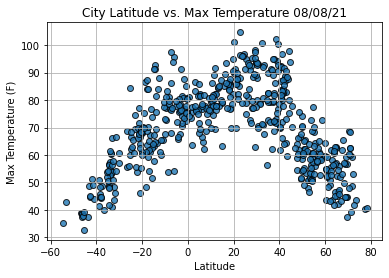

In [45]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Plot Latitude vs. Humidity

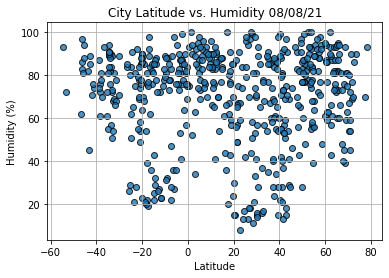

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Plot Latitude vs. Cloudiness

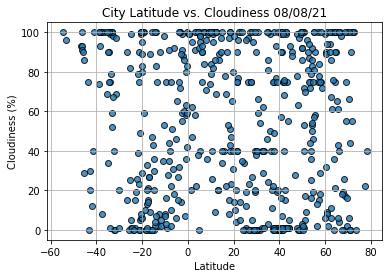

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Plot Latitude vs. Wind Speed

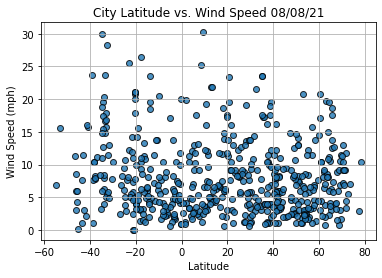

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Use Linear Regression to Find the Relationship Between Variables

In [49]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [50]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [51]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [52]:
# If you don't want to calculate one of these values 
# but do not add it inside the parentheses, you'll get 
# a ValueError: too many values to unpack.

# To prevent this error, add a comma and underscore 
# for each value you don't want to calculate.

# For instance, if you don't want to print out the 
# p-value and the standard error, write your function as 
# (slope, intercept, r_value, _, _) = linregress(x, y).

In [55]:
# Calculate the regression line "y values" from the slope and intercept.
# y = mx + b
regress_values = [(lat * slope + intercept) for lat in lats]

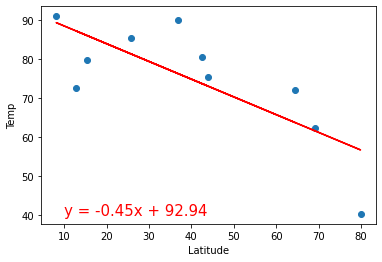

In [56]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()